In [1]:
#importing required packages
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data from csv
crime_raw_data = pd.read_csv('data/rpd_crime_2011_to_present.csv')

In [3]:
print("Shape of imported data file {}".format(crime_raw_data.shape))

Shape of imported data file (76228, 40)


In [4]:
#sample data
crime_raw_data.head(2)

,X,Y,OBJECTID,Geocode_Address,Geocode_Street,Case_Number,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,OccurredFrom_Timestamp,...,Statute_Text,Statute_Description,Statute_CrimeCategory,Statute_Attempted,Weapon_Description,Larceny_Type,Location_Type,Geo_Beat,Geo_Section,Geo_Section_Num
0,-77.643682,43.154498,2001,"166 Syke St, Rochester, NY, 14611",166 SYKE ST,2011-00060353,2011,2,1200,2011-02-21T12:00:00.000Z,...,Burglary,Burglary 3rd: Illegal Entry with Intent to Com...,5,Completed,* No Weapon Specified *,Theft from Building,Single Family Home,203.0,Genesee,3.0
1,-77.643582,43.177149,2002,"506 Glenwood Ave, Rochester, NY, 14613",506 GLENWOOD AVE,2013-00070133,2013,3,2130,2013-03-16T21:30:00.000Z,...,Larceny,Petit Larceny ...,6,Completed,* No Weapon Specified *,Theft from Motor Vehicle,Street,241.0,Lake,1.0


In [5]:
#all attributes in the data
crime_raw_data.columns

Index(['X', 'Y', 'OBJECTID', 'Geocode_Address', 'Geocode_Street',
       'Case_Number', 'OccurredFrom_Date_Year', 'OccurredFrom_Date_Month',
       'OccurredFrom_Time', 'OccurredFrom_Timestamp',
       'OccurredThrough_Date_Year', 'OccurredThrough_Date_Month',
       'OccurredThrough_Time', 'OccurredThrough_Timestamp',
       'Reported_Date_Year', 'Reported_Date_Month', 'Reported_Time',
       'Reported_Timestamp', 'Address_StreetFull', 'Address_City',
       'Address_State', 'Patrol_Beat', 'Patrol_Section', 'Case_Status',
       'Statute_Title', 'Statute_Section', 'Statute_Subsection',
       'Statute_Degree', 'Statute_Class', 'Statute_Category', 'Statute_Text',
       'Statute_Description', 'Statute_CrimeCategory', 'Statute_Attempted',
       'Weapon_Description', 'Larceny_Type', 'Location_Type', 'Geo_Beat',
       'Geo_Section', 'Geo_Section_Num'],
      dtype='object')

In [6]:
#installing folium to enable easy viewing of data on a map
!pip install folium

In [7]:
#importing folium
#reference : https://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/
import folium

In [8]:
crime_type_list = list(crime_raw_data.Statute_Text.unique())
crime_type_list

['Burglary',
 'Larceny',
 'Aggravated Assault',
 'Motor Vehicle Theft',
 'Robbery',
 'Murder',
 'Non-Negligent Manslaughter']

In [9]:
#color palette 
col_palette = sns.color_palette("hls", 8)
col_palette_hex = col_palette.as_hex()
col_palette_hex

['#db5f57',
 '#dbc257',
 '#91db57',
 '#57db80',
 '#57d3db',
 '#5770db',
 '#a157db',
 '#db57b2']

In [10]:
ROC_COORDINATES = (43.16, -77.61)

# for speed purposes
MAX_RECORDS = 1000
 
# create empty map zoomed in on Rochester, NY
map = folium.Map(location=ROC_COORDINATES, tiles='Stamen Toner', zoom_start=12)

#start time 
start_time = time.time()

# add a marker for every record in the filtered data, use a clustered view
for each in crime_raw_data[0:MAX_RECORDS].iterrows():
    if(not np.isnan(each[1]['X'])):
        location = [each[1]['Y'],each[1]['X']]
        tooltip = 'city : ' + each[1]['Address_City'] + '\n crime type : ' + each[1]['Statute_Text']
        index = crime_type_list.index(each[1]['Statute_Text'])
        col = col_palette_hex[index]
        folium.CircleMarker(location,
                        radius=2,
                        popup=tooltip,
                        color=col,
                        fill_color=col,
                       ).add_to(map)


print("---Execution Time {} minutes ---".format((time.time() - start_time)/60))
map

---Execution Time 0.5381489674250285 minutes ---


In [11]:
#legend
import branca.colormap as cm
step = cm.StepColormap(
    col_palette_hex,
    vmin=0, vmax=14,
    index=[0, 2, 4, 6, 8, 10, 12]
)

print(crime_type_list)
step



['Burglary', 'Larceny', 'Aggravated Assault', 'Motor Vehicle Theft', 'Robbery', 'Murder', 'Non-Negligent Manslaughter']


In [12]:
crime_raw_data.columns

Index(['X', 'Y', 'OBJECTID', 'Geocode_Address', 'Geocode_Street',
       'Case_Number', 'OccurredFrom_Date_Year', 'OccurredFrom_Date_Month',
       'OccurredFrom_Time', 'OccurredFrom_Timestamp',
       'OccurredThrough_Date_Year', 'OccurredThrough_Date_Month',
       'OccurredThrough_Time', 'OccurredThrough_Timestamp',
       'Reported_Date_Year', 'Reported_Date_Month', 'Reported_Time',
       'Reported_Timestamp', 'Address_StreetFull', 'Address_City',
       'Address_State', 'Patrol_Beat', 'Patrol_Section', 'Case_Status',
       'Statute_Title', 'Statute_Section', 'Statute_Subsection',
       'Statute_Degree', 'Statute_Class', 'Statute_Category', 'Statute_Text',
       'Statute_Description', 'Statute_CrimeCategory', 'Statute_Attempted',
       'Weapon_Description', 'Larceny_Type', 'Location_Type', 'Geo_Beat',
       'Geo_Section', 'Geo_Section_Num'],
      dtype='object')

In [13]:
#converting city names to upper
crime_raw_data.loc[:,['Address_City']] = crime_raw_data.Address_City.apply(str.upper)

In [14]:
crime_raw_data.groupby(['Address_City','Statute_Text']).size()

Address_City   Statute_Text              
***            Aggravated Assault               39
               Burglary                        113
               Larceny                         501
               Motor Vehicle Theft              32
               Robbery                          42
AUBURN         Motor Vehicle Theft               1
BATH           Motor Vehicle Theft               1
BRIGHTON       Larceny                           1
               Motor Vehicle Theft               3
BROCKPORT      Motor Vehicle Theft               1
EDISON         Aggravated Assault                1
FAIRPORT       Motor Vehicle Theft               1
GATES          Larceny                           1
               Motor Vehicle Theft               4
GREECE         Aggravated Assault                1
               Motor Vehicle Theft               4
HENRIETTA      Larceny                           1
IRONDEQUOIT    Motor Vehicle Theft               6
MONROE COUNTY  Motor Vehicle Theft      

In [15]:
#only getting rochester data
roc_crime_data = crime_raw_data.loc[crime_raw_data.Address_City=='ROCHESTER',:]
roc_crime_data.shape

(75468, 40)

In [16]:
roc_crime_agg = roc_crime_data.groupby(['Address_City','Statute_Text']).size()
roc_crime_agg

Address_City  Statute_Text              
ROCHESTER     Aggravated Assault             6370
              Burglary                      14931
              Larceny                       44630
              Motor Vehicle Theft            4171
              Murder                          222
              Non-Negligent Manslaughter       12
              Robbery                        5132
dtype: int64

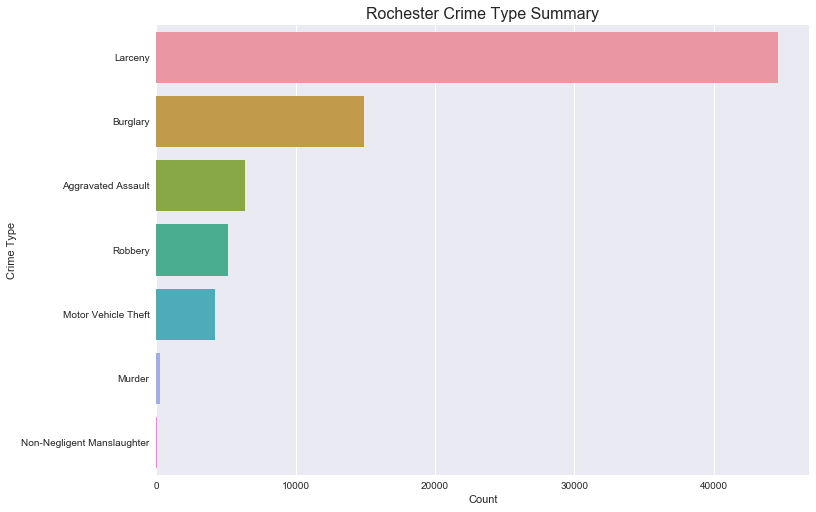

In [42]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
bar_data = roc_crime_agg.reset_index()
bar_data = bar_data.sort_values(by=0,ascending=False)
sns.barplot(y="Statute_Text", x=0, data=bar_data, ax = ax)
ax.set_xlabel('Count')
ax.set_ylabel('Crime Type')
ax.set_title('Rochester Crime Type Summary',size=16)
plt.show()

In [18]:
#unique list of crime of committed in rochester
roc_crime_list = list(roc_crime_data.Statute_Text.unique())
print(roc_crime_list)

['Burglary', 'Larceny', 'Aggravated Assault', 'Motor Vehicle Theft', 'Robbery', 'Murder', 'Non-Negligent Manslaughter']


In [19]:
#magic command to display charts inline
%pylab
%matplotlib inline


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/Users/ajaykliyara/anaconda_py3/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['step', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
import matplotlib
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [21]:
col_palette2 = sns.color_palette("Set2", 10)
col_palette2_hex = col_palette2.as_hex()
col_palette2_hex

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3',
 '#66c2a5',
 '#fc8d62']

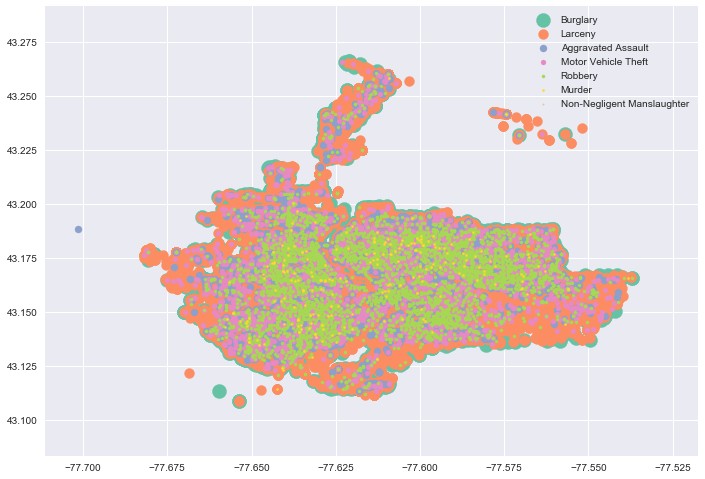

In [22]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
#size = range(140,0,-20)
size = [200,100,50,25,10,5,2]

plt.ion()
#plt.figure()
for crime in roc_crime_list:
    i = roc_crime_list.index(crime)
    temp_crime_data = roc_crime_data.loc[roc_crime_data.Statute_Text==crime,:]
    ax.scatter(temp_crime_data.X, temp_crime_data.Y, color=col_palette2_hex[i],label=crime, s=size[i])
    ax.legend()


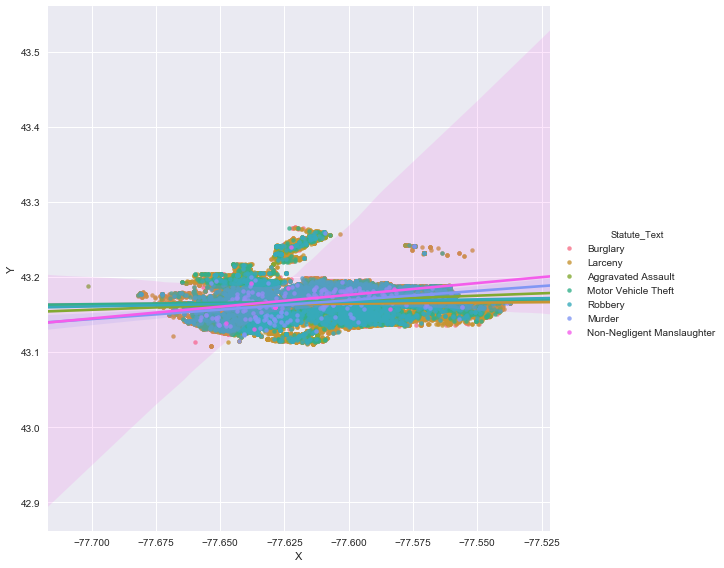

In [23]:
#scatter plot for each type of crime
sns.lmplot(x="X", y="Y", data=roc_crime_data, hue='Statute_Text',size=8,
          scatter_kws={"s": 20})

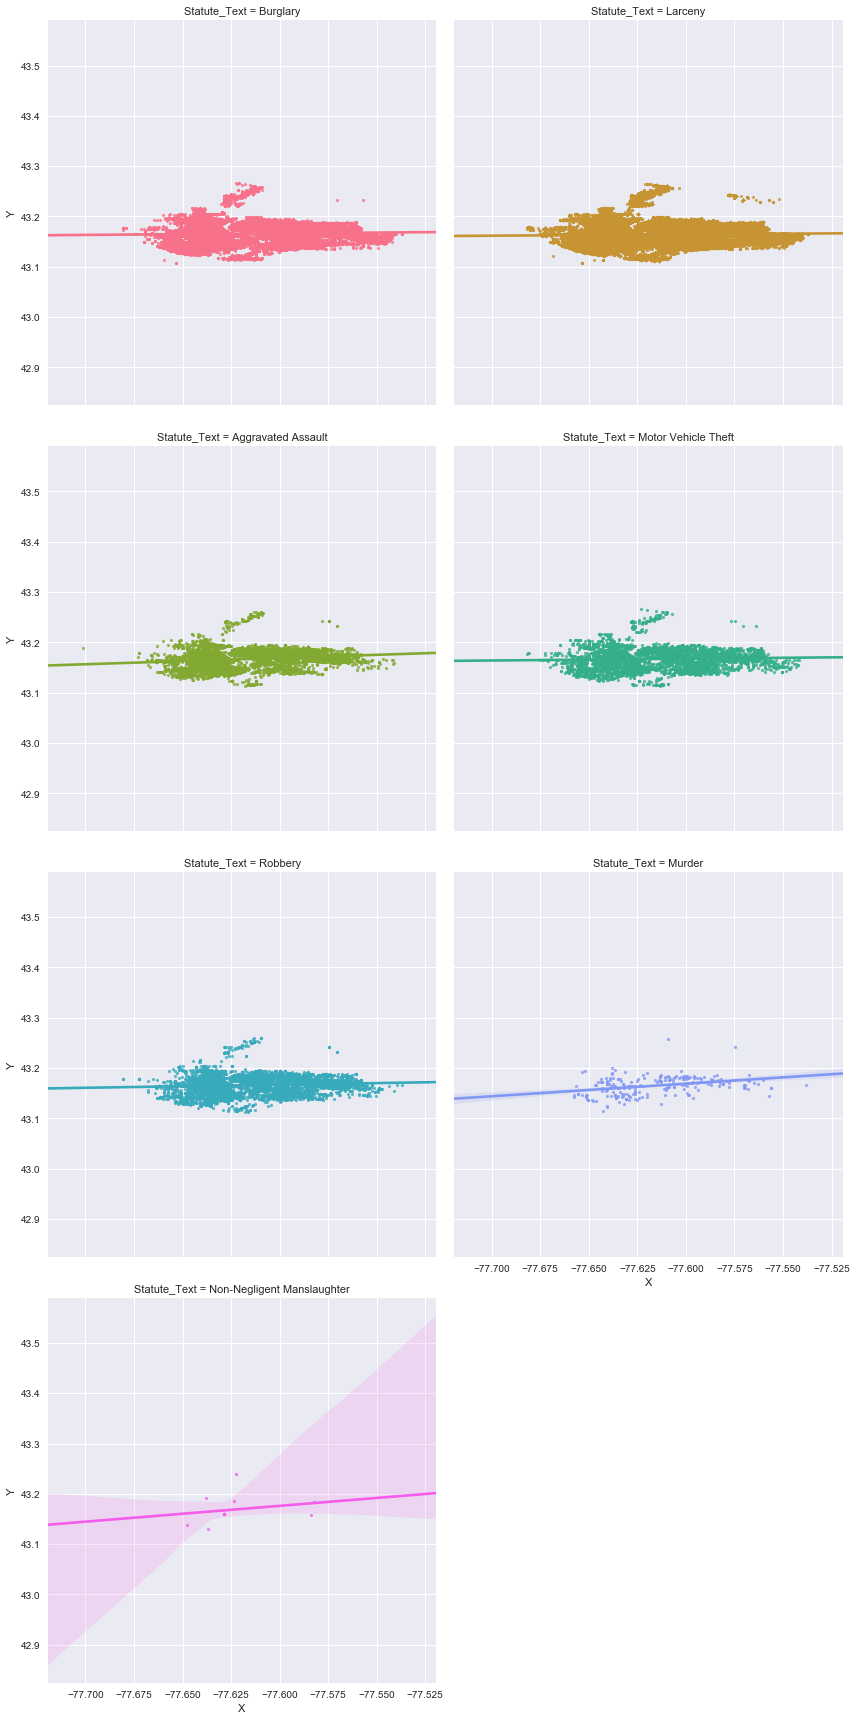

In [24]:
#scatter plot for each type of crime
sns.lmplot(x="X", y="Y", data=roc_crime_data, hue='Statute_Text',col='Statute_Text',size=6, col_wrap=2,
          scatter_kws={"s": 10})

In [25]:
#aggregating data by year
roc_crime_year_agg = roc_crime_data.groupby(['Statute_Text','OccurredFrom_Date_Year']).size()
roc_crime_year_agg

Statute_Text                OccurredFrom_Date_Year
Aggravated Assault          2011                      1060
                            2012                      1016
                            2013                       942
                            2014                       774
                            2015                       890
                            2016                       855
                            2017                       833
Burglary                    2011                      3164
                            2012                      2724
                            2013                      2515
                            2014                      2097
                            2015                      1736
                            2016                      1458
                            2017                      1237
Larceny                     2011                      7602
                            2012                      7390
     

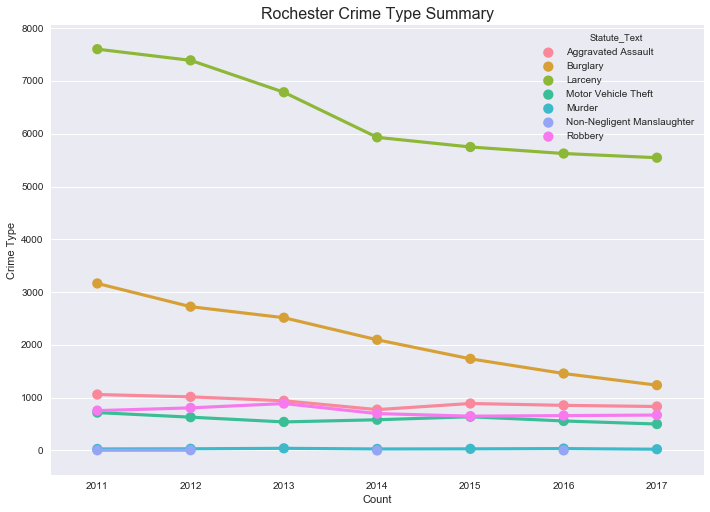

In [26]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
year_data = roc_crime_year_agg.reset_index()
#year_data = bar_data.sort_values(by=0,ascending=False)
sns.pointplot(y=0, x='OccurredFrom_Date_Year', data=year_data, hue= 'Statute_Text', ax = ax)
ax.set_xlabel('Count')
ax.set_ylabel('Crime Type')
ax.set_title('Rochester Crime Type Summary',size=16)

In [27]:
#aggregating data by year
roc_crime_year_month_agg = roc_crime_data.groupby(['Statute_Text','OccurredFrom_Date_Year','OccurredFrom_Date_Month']).size()
roc_crime_year_month_agg

Statute_Text        OccurredFrom_Date_Year  OccurredFrom_Date_Month
Aggravated Assault  2011                    1                           82
                                            2                           57
                                            3                           84
                                            4                           85
                                            5                          115
                                            6                          107
                                            7                          109
                                            8                          101
                                            9                           99
                                            10                          86
                                            11                          68
                                            12                          67
                    2012        

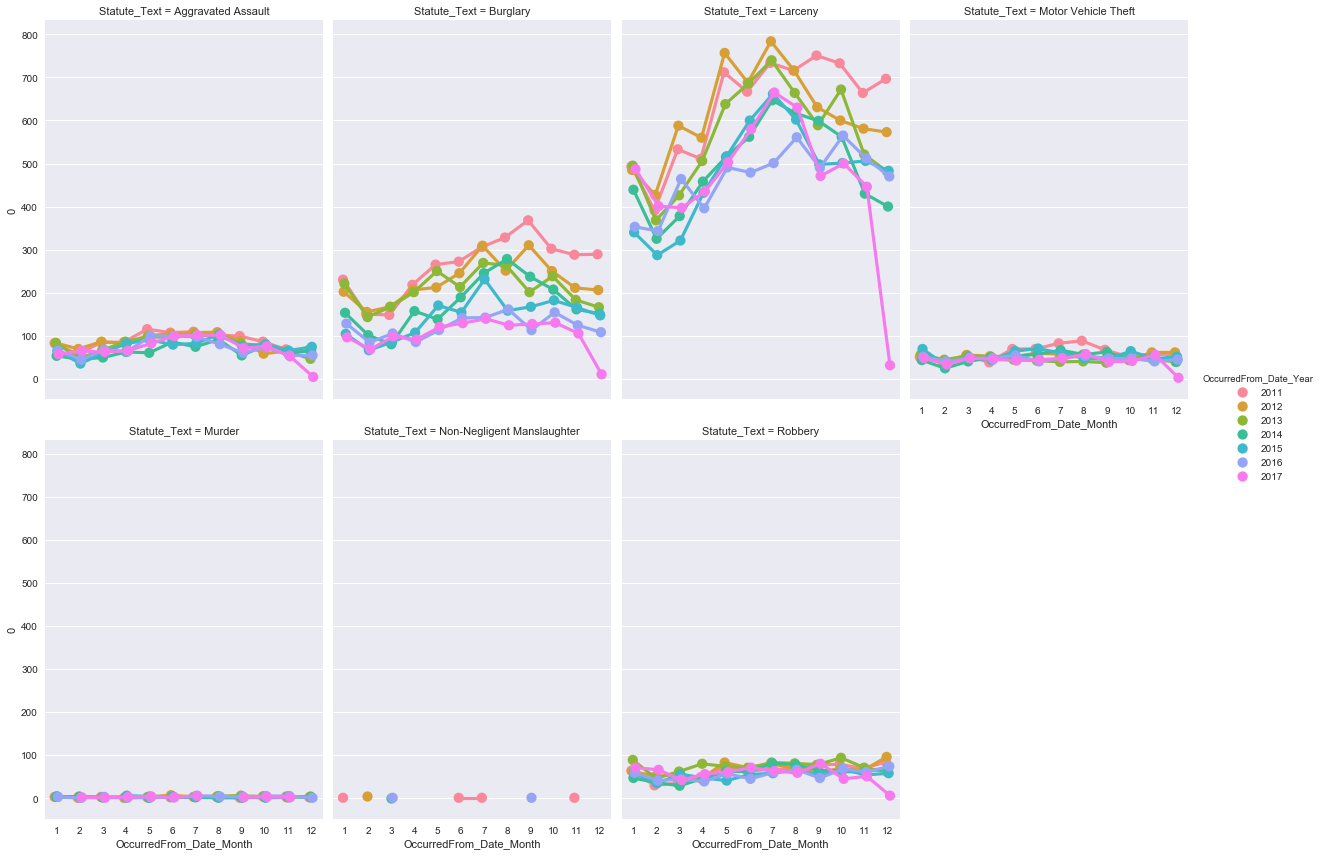

In [28]:
#fig, ax = plt.subplots()
# the size of A4 paper
#fig.set_size_inches(11.7, 8.27)
year_month_data = roc_crime_year_month_agg.reset_index()
#year_data = bar_data.sort_values(by=0,ascending=False)
sns.factorplot(y=0, x='OccurredFrom_Date_Month', data=year_month_data, hue= 'OccurredFrom_Date_Year', 
              col="Statute_Text", kind="point", dodge=True, size=6, aspect=.7, col_wrap=4)


In [29]:
roc_crime_data.loc[:,'OccurredFrom_Hour'] = roc_crime_data.OccurredFrom_Time  // 100

/Users/ajaykliyara/anaconda_py3/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ajaykliyara/anaconda_py3/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
time_month_overall = roc_crime_data.groupby(['OccurredFrom_Date_Month','OccurredFrom_Hour']).size()
time_month_overall = time_month_overall.reset_index()
time_month_overall_pivot = time_month_overall.pivot('OccurredFrom_Date_Month','OccurredFrom_Hour',0)
time_month_overall_pivot

OccurredFrom_Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
OccurredFrom_Date_Month,,,,,,,,,,,,,,,,,,,,,
1,334,151,138,81,62,53,87,145,227,225,...,293,317,315,315,319,337,281,252,264,257
2,240,137,110,56,50,31,68,96,186,163,...,244,249,237,248,245,222,223,198,200,178
3,294,146,114,77,60,48,83,132,201,242,...,258,278,273,283,280,247,289,272,262,231
4,321,142,134,71,61,55,86,132,196,249,...,261,299,289,315,330,292,288,325,333,297
5,417,216,153,104,79,73,98,157,274,258,...,337,417,360,403,385,365,357,394,389,336
6,482,229,196,107,81,90,102,141,275,283,...,341,343,356,439,389,355,342,374,423,423
7,538,269,226,157,94,76,112,177,255,273,...,361,408,412,463,459,397,415,479,499,473
8,539,221,251,152,100,99,96,152,247,258,...,360,379,380,441,433,379,442,459,462,411
9,392,186,163,128,101,62,133,185,267,279,...,326,404,378,381,407,326,360,363,341,336


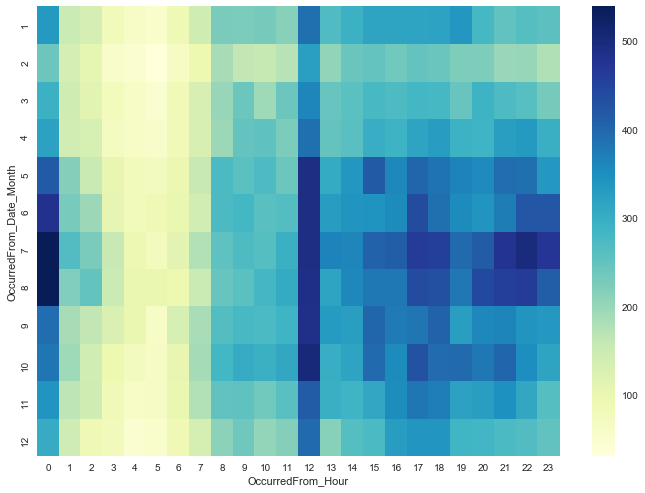

In [31]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.heatmap(time_month_overall_pivot, cmap="YlGnBu", ax=ax)

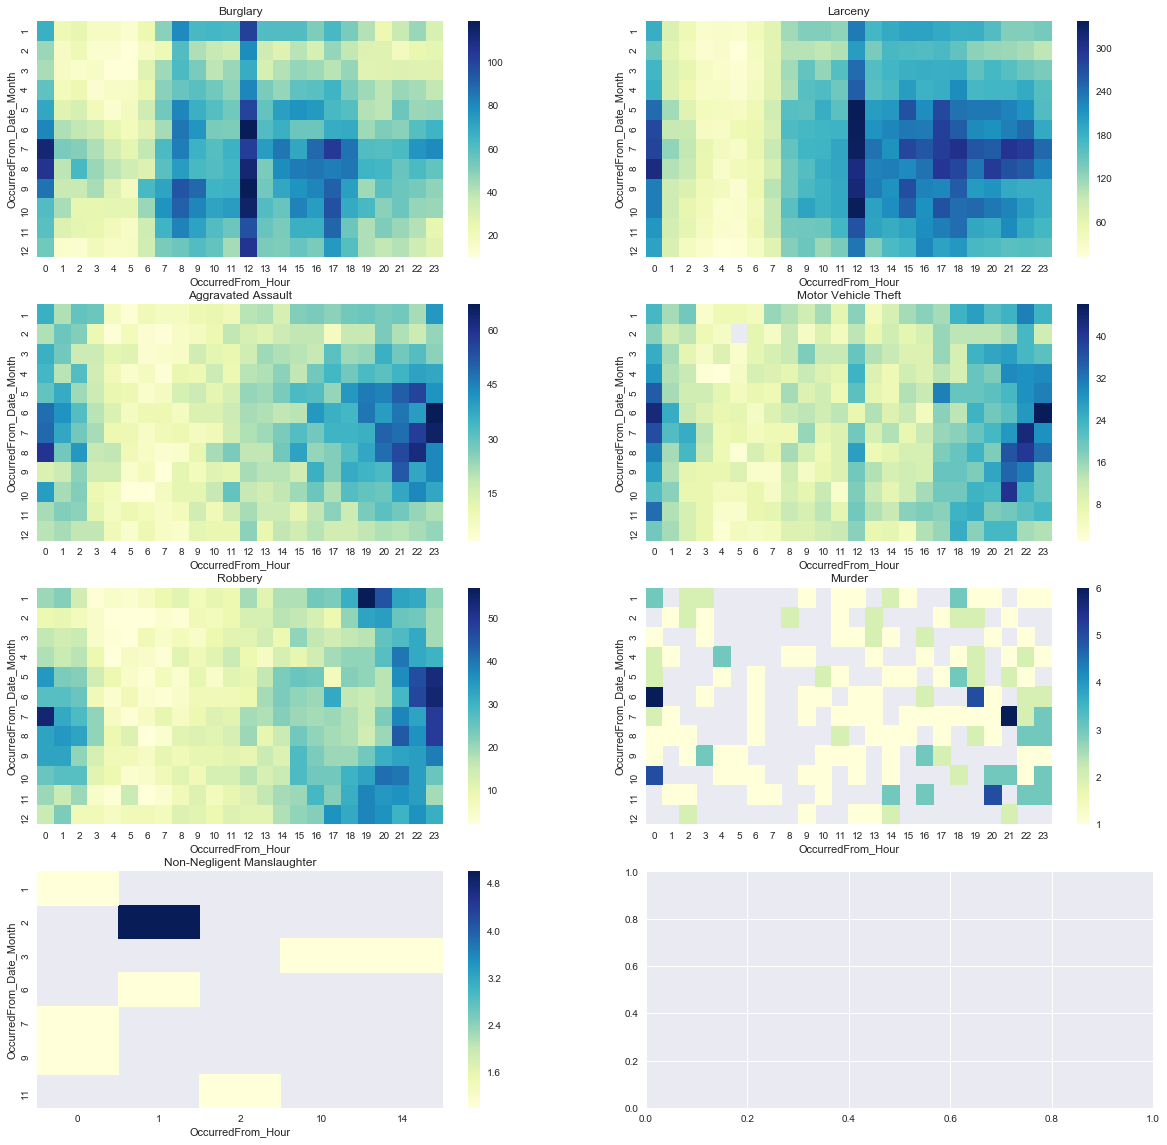

In [32]:
#burglary
fig, ax = plt.subplots(4,2)
# the size of A4 paper
fig.set_size_inches(20, 20)

ctr = 0
for i in range(4):
    for j in range(2):
        if(ctr>6):
            break
        else:
            crime = roc_crime_list[ctr]
            time_month_overall_sp = roc_crime_data.loc[roc_crime_data.Statute_Text==crime,:].groupby(['OccurredFrom_Date_Month','OccurredFrom_Hour']).size()
            time_month_overall_sp = time_month_overall_sp.reset_index()
            time_month_overall_sp_pivot = time_month_overall_sp.pivot('OccurredFrom_Date_Month','OccurredFrom_Hour',0)
            #fig, ax = plt.subplots()
            # the size of A4 paper
            #fig.set_size_inches(11.7, 8.27)
            #print(i,j)
            sns.heatmap(time_month_overall_sp_pivot, cmap="YlGnBu", ax=ax[i][j])
            ax[i][j].set_title(crime)
            ctr+=1


In [35]:
crime_raw_data.Statute_Text.unique()

array(['Burglary', 'Larceny', 'Aggravated Assault', 'Motor Vehicle Theft',
       'Robbery', 'Murder', 'Non-Negligent Manslaughter'], dtype=object)

In [41]:
t = crime_raw_data.groupby(['Statute_Text','Geo_Section']).size()
t

Statute_Text                Geo_Section
Aggravated Assault          Central          383
                            Clinton         2127
                            Genesee         1302
                            Goodman          923
                            Lake            1643
Burglary                    Central          903
                            Clinton         3450
                            Genesee         3088
                            Goodman         3350
                            Lake            4140
Larceny                     Central         6828
                            Clinton        10072
                            Genesee         8407
                            Goodman        10398
                            Lake            9182
Motor Vehicle Theft         Central          312
                            Clinton         1160
                            Genesee          773
                            Goodman          846
                            L